<a href="https://colab.research.google.com/github/Samiha9864/CVPR/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [9]:

TRAIN_DIR = '/content/drive/MyDrive/New folder100 (1)'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['panda100 - Copy (1)', 'dog100 - Copy (1)', 'cat100 - Copy (1)']


In [10]:
TRAIN_DATA = []
IMG_SIZE = 500
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # Read as grayscale for simplicity
            resized_img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) # Resize the image
            TRAIN_DATA.append({
                'image': resized_img_arr,
                'class': class_num
            })
        except Exception as e:
            pass

print(len(TRAIN_DATA))

100%|██████████| 100/100 [00:01<00:00, 58.67it/s]

300


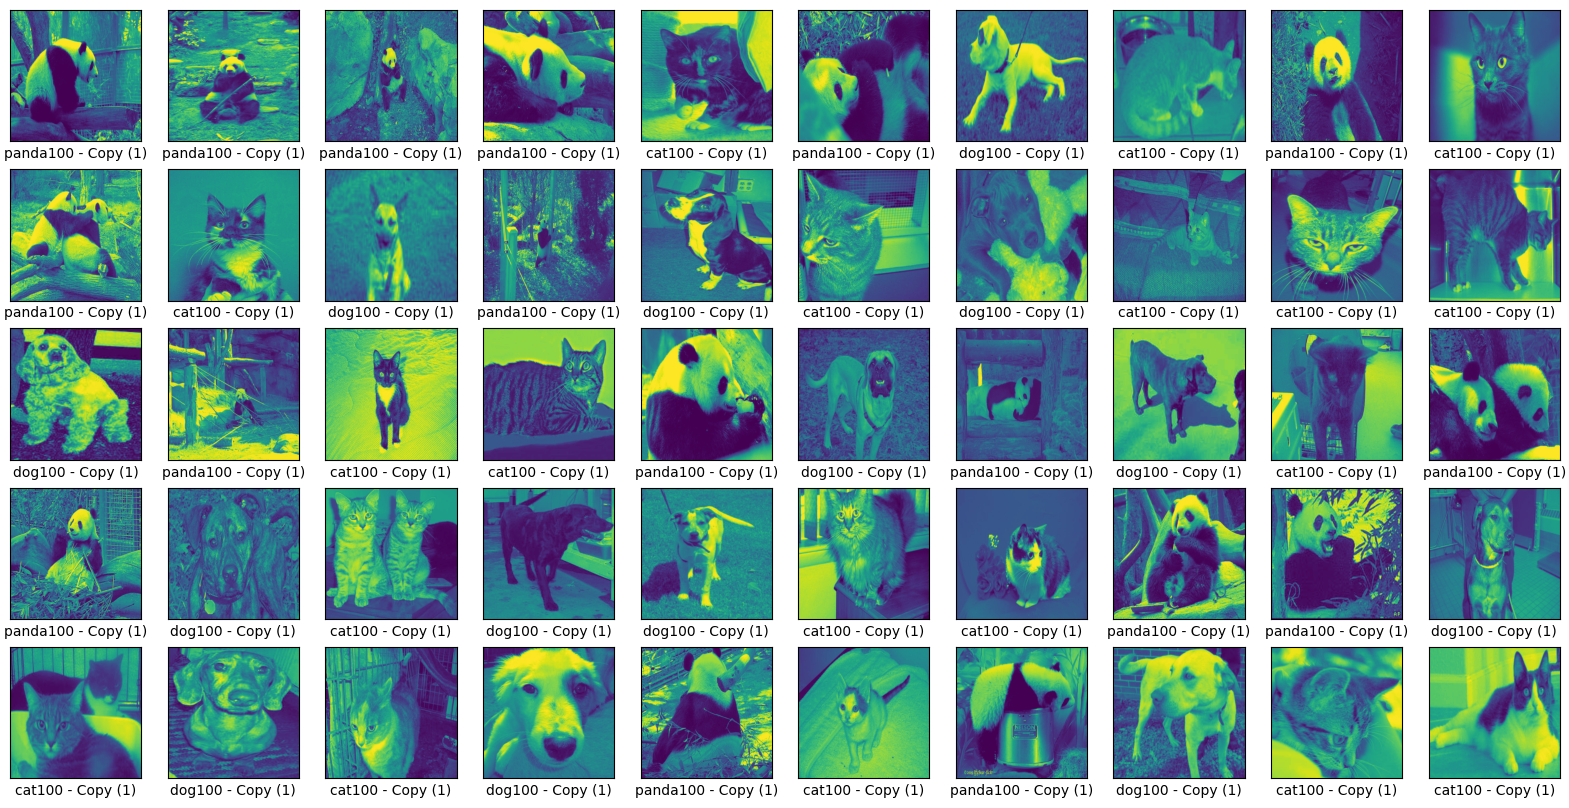

In [11]:

random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i]['image'])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i]['class']])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [12]:
f0 = TRAIN_DATA[0:100]

def train_test_split(X, y, test_size=0.2):
    X_train = X[:int(len(X)*(1-test_size))]
    X_test = X[int(len(X)*(1-test_size)):]
    y_train = y[:int(len(y)*(1-test_size))]
    y_test = y[int(len(y)*(1-test_size)):]
    return X_train, X_test, y_train, y_test

In [13]:
class KNeighborClassifer:
    k = None

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def accuracy(self, y_actual, y_pred):
        return np.sum(y_actual == y_pred) / len(y_actual)

    def predict(self, X_test, l_func = "l2"):
        y_predtion = []
        i = 0
        for x in tqdm(X_test):
            distances = []
            for i in range(len(self.X)):
                if l_func == "l2":
                    distance = np.sqrt(np.sum((x - self.X[i])**2))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
                elif l_func == "l1":
                    distance = np.sum(np.abs(x - self.X[i]))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
            distances.sort(key=lambda x: x['distance'])
            k_nearest = distances[:self.k]
            k_nearest_classes = [x['class'] for x in k_nearest]
            y_predtion.append(max(set(k_nearest_classes), key=k_nearest_classes.count))
        return y_predtion

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

X = np.array([i['image'] for i in TRAIN_DATA[:100]])
y = np.array([i['class'] for i in TRAIN_DATA[:100]])

k_neighbors = np.arange(1, 20)
num_folds = 5

fold_accuracies_l1 = {}
fold_accuracies_l2 = {}

for k in tqdm(k_neighbors):
    acc_l1_folds = []
    acc_l2_folds = []

    for _ in range(num_folds):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        knn = KNeighborClassifer(k)
        knn.fit(X_train, y_train)

        # Predict
        y_pred_l1 = knn.predict(X_test, l_func="l1")
        y_pred_l2 = knn.predict(X_test, l_func="l2")

        # Accuracy
        acc_l1 = knn.accuracy(y_test, y_pred_l1)
        acc_l2 = knn.accuracy(y_test, y_pred_l2)

        acc_l1_folds.append(acc_l1)
        acc_l2_folds.append(acc_l2)

    # Save all fold results for this k
    fold_accuracies_l1[k] = acc_l1_folds
    fold_accuracies_l2[k] = acc_l2_folds

    print(f"k={k} → L1 mean={np.mean(acc_l1_folds):.3f}, std={np.std(acc_l1_folds):.3f}")
    print(f"k={k} → L2 mean={np.mean(acc_l2_folds):.3f}, std={np.std(acc_l2_folds):.3f}")


100%|██████████| 20/20 [00:00<00:00, 20.66it/s]

100%|██████████| 20/20 [00:01<00:00, 13.02it/s]

100%|██████████| 20/20 [00:00<00:00, 39.96it/s]

100%|██████████| 20/20 [00:00<00:00, 51.50it/s]

100%|██████████| 20/20 [00:00<00:00, 51.74it/s]

100%|██████████| 20/20 [00:00<00:00, 51.50it/s]

100%|██████████| 20/20 [00:00<00:00, 54.19it/s]

100%|██████████| 20/20 [00:00<00:00, 49.78it/s]

100%|██████████| 20/20 [00:00<00:00, 52.40it/s]

  5%|▌         | 1/19 [00:05<01:44,  5.78s/it]

k=1 → L1 mean=0.400, std=0.000
k=1 → L2 mean=0.200, std=0.000



100%|██████████| 20/20 [00:00<00:00, 53.85it/s]

100%|██████████| 20/20 [00:00<00:00, 51.25it/s]

100%|██████████| 20/20 [00:00<00:00, 51.92it/s]

100%|██████████| 20/20 [00:00<00:00, 49.95it/s]

100%|██████████| 20/20 [00:00<00:00, 51.09it/s]

100%|██████████| 20/20 [00:00<00:00, 51.11it/s]

100%|██████████| 20/20 [00:00<00:00, 53.72it/s]

100%|██████████| 20/20 [00:00<00:00, 48.75it/s]

100%|██████████| 20/20 [00:00<00:00, 53.20it/s]

 11%|█         | 2/19 [00:09<01:19,  4.69s/it]

k=2 → L1 mean=0.300, std=0.000
k=2 → L2 mean=0.500, std=0.000



100%|██████████| 20/20 [00:00<00:00, 51.59it/s]

100%|██████████| 20/20 [00:00<00:00, 51.76it/s]

100%|██████████| 20/20 [00:00<00:00, 52.01it/s]

100%|██████████| 20/20 [00:00<00:00, 51.15it/s]

100%|██████████| 20/20 [00:00<00:00, 54.07it/s]

100%|██████████| 20/20 [00:00<00:00, 50.06it/s]

100%|██████████| 20/20 [00:00<00:00, 53.46it/s]

100%|██████████| 20/20 [00:00<00:00, 52.19it/s]

100%|██████████| 20/20 [00:00<00:00, 35.22it/s]

 16%|█▌        | 3/19 [00:13<01:11,  4.49s/it]

k=3 → L1 mean=0.350, std=0.000
k=3 → L2 mean=0.450, std=0.000



100%|██████████| 20/20 [00:00<00:00, 37.28it/s]

100%|██████████| 20/20 [00:00<00:00, 38.01it/s]

100%|██████████| 20/20 [00:00<00:00, 38.44it/s]

100%|██████████| 20/20 [00:00<00:00, 34.13it/s]

100%|██████████| 20/20 [00:00<00:00, 33.86it/s]

100%|██████████| 20/20 [00:00<00:00, 35.31it/s]

100%|██████████| 20/20 [00:00<00:00, 53.70it/s]

100%|██████████| 20/20 [00:00<00:00, 51.30it/s]

100%|██████████| 20/20 [00:00<00:00, 51.80it/s]

 21%|██        | 4/19 [00:18<01:09,  4.67s/it]

k=4 → L1 mean=0.300, std=0.000
k=4 → L2 mean=0.350, std=0.000



100%|██████████| 20/20 [00:00<00:00, 53.01it/s]

100%|██████████| 20/20 [00:00<00:00, 50.25it/s]

100%|██████████| 20/20 [00:00<00:00, 52.92it/s]

100%|██████████| 20/20 [00:00<00:00, 49.18it/s]

100%|██████████| 20/20 [00:00<00:00, 50.81it/s]

100%|██████████| 20/20 [00:00<00:00, 50.10it/s]

100%|██████████| 20/20 [00:00<00:00, 52.22it/s]

100%|██████████| 20/20 [00:00<00:00, 52.01it/s]

100%|██████████| 20/20 [00:00<00:00, 53.81it/s]

 26%|██▋       | 5/19 [00:22<01:01,  4.41s/it]

k=5 → L1 mean=0.300, std=0.000
k=5 → L2 mean=0.450, std=0.000



100%|██████████| 20/20 [00:00<00:00, 53.14it/s]

100%|██████████| 20/20 [00:00<00:00, 49.48it/s]

100%|██████████| 20/20 [00:00<00:00, 53.87it/s]

100%|██████████| 20/20 [00:00<00:00, 50.96it/s]

100%|██████████| 20/20 [00:00<00:00, 51.61it/s]

100%|██████████| 20/20 [00:00<00:00, 50.98it/s]

100%|██████████| 20/20 [00:00<00:00, 52.48it/s]

100%|██████████| 20/20 [00:00<00:00, 50.60it/s]

100%|██████████| 20/20 [00:00<00:00, 52.17it/s]

 32%|███▏      | 6/19 [00:26<00:55,  4.25s/it]

k=6 → L1 mean=0.300, std=0.000
k=6 → L2 mean=0.600, std=0.000



100%|██████████| 20/20 [00:00<00:00, 53.20it/s]

100%|██████████| 20/20 [00:00<00:00, 35.13it/s]

100%|██████████| 20/20 [00:00<00:00, 39.82it/s]

100%|██████████| 20/20 [00:00<00:00, 20.16it/s]

100%|██████████| 20/20 [00:00<00:00, 39.58it/s]

100%|██████████| 20/20 [00:00<00:00, 33.62it/s]

100%|██████████| 20/20 [00:00<00:00, 34.18it/s]

100%|██████████| 20/20 [00:00<00:00, 32.21it/s]

100%|██████████| 20/20 [00:00<00:00, 48.93it/s]

 37%|███▋      | 7/19 [00:32<00:56,  4.70s/it]

k=7 → L1 mean=0.350, std=0.000
k=7 → L2 mean=0.500, std=0.000



100%|██████████| 20/20 [00:00<00:00, 53.22it/s]

100%|██████████| 20/20 [00:00<00:00, 49.58it/s]

100%|██████████| 20/20 [00:00<00:00, 53.71it/s]

100%|██████████| 20/20 [00:00<00:00, 51.62it/s]

100%|██████████| 20/20 [00:00<00:00, 50.64it/s]

100%|██████████| 20/20 [00:00<00:00, 50.53it/s]

100%|██████████| 20/20 [00:00<00:00, 51.01it/s]

100%|██████████| 20/20 [00:00<00:00, 51.35it/s]

100%|██████████| 20/20 [00:00<00:00, 53.69it/s]

 42%|████▏     | 8/19 [00:36<00:49,  4.46s/it]

k=8 → L1 mean=0.200, std=0.000
k=8 → L2 mean=0.450, std=0.000



100%|██████████| 20/20 [00:00<00:00, 52.82it/s]

100%|██████████| 20/20 [00:00<00:00, 51.23it/s]

100%|██████████| 20/20 [00:00<00:00, 50.22it/s]

100%|██████████| 20/20 [00:00<00:00, 51.11it/s]

100%|██████████| 20/20 [00:00<00:00, 50.67it/s]

100%|██████████| 20/20 [00:00<00:00, 51.41it/s]

100%|██████████| 20/20 [00:00<00:00, 52.95it/s]

100%|██████████| 20/20 [00:00<00:00, 49.71it/s]

100%|██████████| 20/20 [00:00<00:00, 53.53it/s]

 47%|████▋     | 9/19 [00:40<00:43,  4.30s/it]

k=9 → L1 mean=0.350, std=0.000
k=9 → L2 mean=0.400, std=0.000



100%|██████████| 20/20 [00:00<00:00, 52.08it/s]

100%|██████████| 20/20 [00:00<00:00, 51.02it/s]

100%|██████████| 20/20 [00:00<00:00, 51.57it/s]

100%|██████████| 20/20 [00:00<00:00, 40.85it/s]

100%|██████████| 20/20 [00:00<00:00, 37.03it/s]

100%|██████████| 20/20 [00:00<00:00, 35.69it/s]

100%|██████████| 20/20 [00:00<00:00, 23.77it/s]

100%|██████████| 20/20 [00:00<00:00, 21.35it/s]

100%|██████████| 20/20 [00:00<00:00, 36.21it/s]

 53%|█████▎    | 10/19 [00:46<00:42,  4.75s/it]

k=10 → L1 mean=0.200, std=0.000
k=10 → L2 mean=0.450, std=0.000



100%|██████████| 20/20 [00:00<00:00, 40.27it/s]

100%|██████████| 20/20 [00:00<00:00, 49.44it/s]

100%|██████████| 20/20 [00:00<00:00, 51.68it/s]

100%|██████████| 20/20 [00:00<00:00, 50.56it/s]

100%|██████████| 20/20 [00:00<00:00, 51.73it/s]

100%|██████████| 20/20 [00:00<00:00, 51.21it/s]

100%|██████████| 20/20 [00:00<00:00, 51.13it/s]

100%|██████████| 20/20 [00:00<00:00, 50.69it/s]

100%|██████████| 20/20 [00:00<00:00, 53.17it/s]

 58%|█████▊    | 11/19 [00:50<00:36,  4.55s/it]

k=11 → L1 mean=0.250, std=0.000
k=11 → L2 mean=0.400, std=0.000



100%|██████████| 20/20 [00:00<00:00, 48.66it/s]

100%|██████████| 20/20 [00:01<00:00, 19.82it/s]

100%|██████████| 20/20 [00:00<00:00, 51.89it/s]

100%|██████████| 20/20 [00:00<00:00, 50.55it/s]

100%|██████████| 20/20 [00:00<00:00, 52.72it/s]

100%|██████████| 20/20 [00:00<00:00, 49.49it/s]

100%|██████████| 20/20 [00:00<00:00, 53.13it/s]

100%|██████████| 20/20 [00:00<00:00, 50.64it/s]

100%|██████████| 20/20 [00:00<00:00, 49.19it/s]

 63%|██████▎   | 12/19 [00:54<00:32,  4.57s/it]

k=12 → L1 mean=0.250, std=0.000
k=12 → L2 mean=0.450, std=0.000



100%|██████████| 20/20 [00:00<00:00, 50.54it/s]

100%|██████████| 20/20 [00:00<00:00, 50.49it/s]

100%|██████████| 20/20 [00:00<00:00, 53.55it/s]

100%|██████████| 20/20 [00:00<00:00, 46.06it/s]

100%|██████████| 20/20 [00:00<00:00, 36.31it/s]

100%|██████████| 20/20 [00:00<00:00, 35.87it/s]

100%|██████████| 20/20 [00:00<00:00, 20.42it/s]

100%|██████████| 20/20 [00:00<00:00, 35.84it/s]

100%|██████████| 20/20 [00:00<00:00, 34.77it/s]

 68%|██████▊   | 13/19 [01:00<00:29,  4.85s/it]

k=13 → L1 mean=0.250, std=0.000
k=13 → L2 mean=0.400, std=0.000



100%|██████████| 20/20 [00:00<00:00, 32.62it/s]

100%|██████████| 20/20 [00:00<00:00, 47.41it/s]

100%|██████████| 20/20 [00:00<00:00, 51.57it/s]

100%|██████████| 20/20 [00:00<00:00, 50.60it/s]

100%|██████████| 20/20 [00:00<00:00, 53.23it/s]

100%|██████████| 20/20 [00:00<00:00, 49.55it/s]

100%|██████████| 20/20 [00:00<00:00, 51.88it/s]

100%|██████████| 20/20 [00:00<00:00, 49.12it/s]

100%|██████████| 20/20 [00:00<00:00, 52.33it/s]

 74%|███████▎  | 14/19 [01:04<00:23,  4.66s/it]

k=14 → L1 mean=0.250, std=0.000
k=14 → L2 mean=0.550, std=0.000



100%|██████████| 20/20 [00:00<00:00, 50.96it/s]

100%|██████████| 20/20 [00:00<00:00, 50.53it/s]

100%|██████████| 20/20 [00:00<00:00, 50.95it/s]

100%|██████████| 20/20 [00:00<00:00, 51.33it/s]

100%|██████████| 20/20 [00:00<00:00, 53.19it/s]

100%|██████████| 20/20 [00:00<00:00, 49.23it/s]

100%|██████████| 20/20 [00:00<00:00, 52.15it/s]

100%|██████████| 20/20 [00:00<00:00, 49.87it/s]

100%|██████████| 20/20 [00:00<00:00, 50.98it/s]

 79%|███████▉  | 15/19 [01:08<00:17,  4.46s/it]

k=15 → L1 mean=0.200, std=0.000
k=15 → L2 mean=0.450, std=0.000



100%|██████████| 20/20 [00:00<00:00, 51.06it/s]

100%|██████████| 20/20 [00:00<00:00, 50.25it/s]

100%|██████████| 20/20 [00:00<00:00, 53.32it/s]

100%|██████████| 20/20 [00:00<00:00, 49.48it/s]

100%|██████████| 20/20 [00:00<00:00, 52.43it/s]

100%|██████████| 20/20 [00:00<00:00, 49.70it/s]

100%|██████████| 20/20 [00:00<00:00, 38.67it/s]

100%|██████████| 20/20 [00:00<00:00, 35.19it/s]

100%|██████████| 20/20 [00:00<00:00, 36.96it/s]

 84%|████████▍ | 16/19 [01:13<00:13,  4.50s/it]

k=16 → L1 mean=0.250, std=0.000
k=16 → L2 mean=0.550, std=0.000



100%|██████████| 20/20 [00:00<00:00, 38.63it/s]

100%|██████████| 20/20 [00:00<00:00, 33.85it/s]

100%|██████████| 20/20 [00:00<00:00, 35.15it/s]

100%|██████████| 20/20 [00:00<00:00, 31.40it/s]

100%|██████████| 20/20 [00:00<00:00, 49.92it/s]

100%|██████████| 20/20 [00:00<00:00, 48.66it/s]

100%|██████████| 20/20 [00:00<00:00, 52.28it/s]

100%|██████████| 20/20 [00:00<00:00, 51.36it/s]

100%|██████████| 20/20 [00:00<00:00, 49.87it/s]

 89%|████████▉ | 17/19 [01:17<00:09,  4.58s/it]

k=17 → L1 mean=0.250, std=0.000
k=17 → L2 mean=0.550, std=0.000



100%|██████████| 20/20 [00:00<00:00, 50.41it/s]

100%|██████████| 20/20 [00:00<00:00, 50.41it/s]

100%|██████████| 20/20 [00:00<00:00, 53.73it/s]

100%|██████████| 20/20 [00:00<00:00, 49.30it/s]

100%|██████████| 20/20 [00:00<00:00, 52.51it/s]

100%|██████████| 20/20 [00:00<00:00, 50.33it/s]

100%|██████████| 20/20 [00:00<00:00, 50.26it/s]

100%|██████████| 20/20 [00:00<00:00, 48.07it/s]

100%|██████████| 20/20 [00:00<00:00, 50.77it/s]

 95%|█████████▍| 18/19 [01:21<00:04,  4.41s/it]

k=18 → L1 mean=0.250, std=0.000
k=18 → L2 mean=0.550, std=0.000



100%|██████████| 20/20 [00:00<00:00, 52.00it/s]

100%|██████████| 20/20 [00:00<00:00, 49.10it/s]

100%|██████████| 20/20 [00:00<00:00, 53.36it/s]

100%|██████████| 20/20 [00:00<00:00, 48.11it/s]

100%|██████████| 20/20 [00:00<00:00, 53.36it/s]

100%|██████████| 20/20 [00:00<00:00, 50.16it/s]

100%|██████████| 20/20 [00:00<00:00, 50.63it/s]

100%|██████████| 20/20 [00:00<00:00, 51.55it/s]

100%|██████████| 20/20 [00:00<00:00, 52.21it/s]

100%|██████████| 19/19 [01:26<00:00,  4.53s/it]

k=19 → L1 mean=0.250, std=0.000
k=19 → L2 mean=0.550, std=0.000


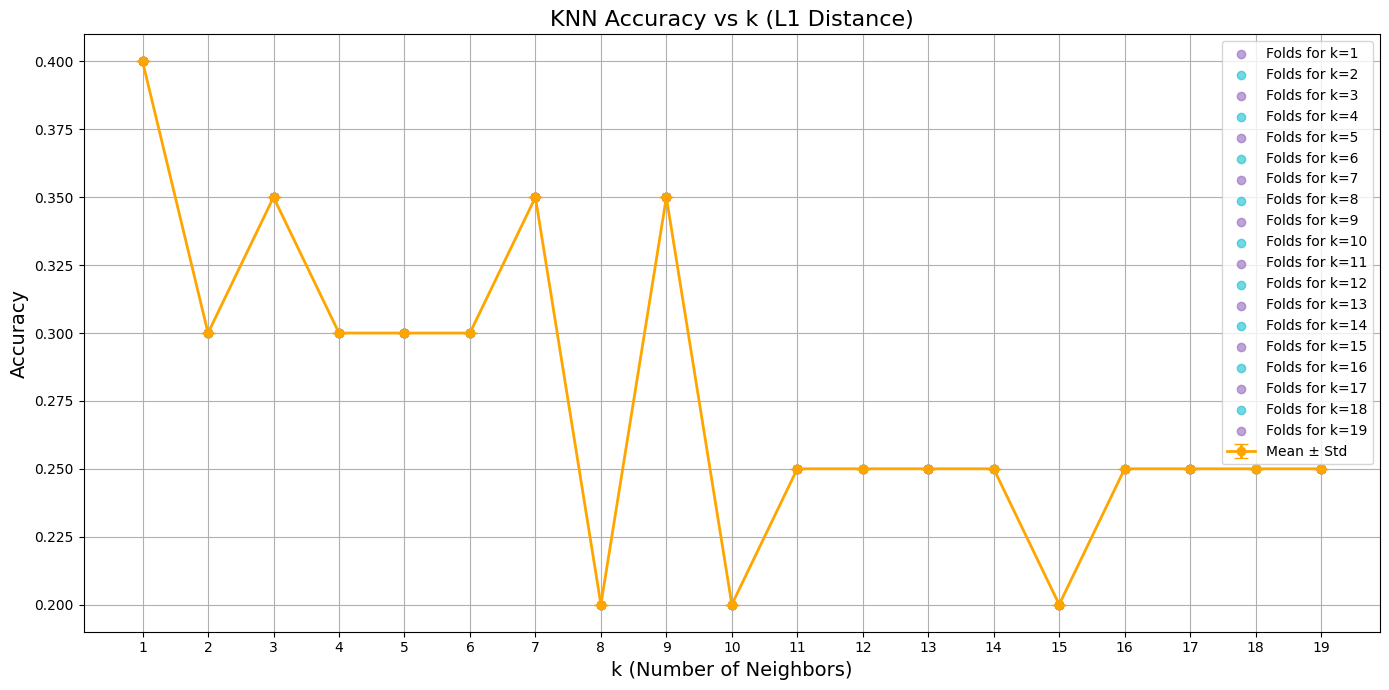

In [36]:

fold_accuracies = fold_accuracies_l1

k_values = sorted(fold_accuracies.keys())
means = [np.mean(fold_accuracies[k]) for k in k_values]
stds  = [np.std(fold_accuracies[k]) for k in k_values]

plt.figure(figsize=(14, 7))
plt.title("KNN Accuracy vs k (L1 Distance)", fontsize=16)
plt.xlabel("k (Number of Neighbors)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

for k in k_values:
    for fold_acc in fold_accuracies[k]:
        plt.scatter(k, fold_acc, label=f"Folds for k={k}", alpha=0.6)

plt.errorbar(k_values, means, yerr=stds, fmt='-o', color='orange', linewidth=2, capsize=5, label="Mean ± Std")

handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), fontsize=10)

plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()
